In [2]:

import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cbook as cbook
import numpy as np
from scipy.interpolate import interp1d, interp2d, griddata
from shapely.geometry import Point
from matplotlib.pyplot import imshow


<AxesSubplot:>

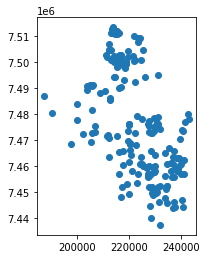

In [3]:
path = os.getcwd()+ '\Dados vetoriais\Pontos amostrais_Piracicaba\Dados_227pts_original_06_03_2021.shp'
pontos_pira = gpd.read_file(path)
pontos_pira.plot()

<AxesSubplot:>

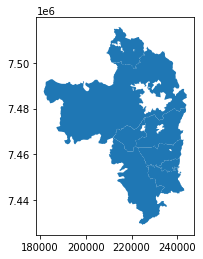

In [3]:
path2 = os.getcwd()+ '\Dados vetoriais\Piracicaba\Perimetro_Piracicaba.shp'
perimetro_pira = gpd.read_file(path2)
perimetro_pira.plot()

In [4]:
xizes = []
ypsolons = []

for geom in perimetro_pira.exterior:
    if(geom == None):
        continue
    xizes.extend(geom.coords.xy[0])
    ypsolons.extend(geom.coords.xy[1])

In [5]:
d = {'x': xizes, 'y': ypsolons}
df = pd.DataFrame(data = d)
df = df.drop_duplicates(subset='x', keep='last')
df = df.drop_duplicates(subset='y', keep='last')
df = df.reset_index()

In [6]:
y_f = interp2d(pontos_pira.geometry.x, pontos_pira.geometry.y, pontos_pira.Argila, 'cubic')
y = y_f(df['x'],df['y'])

C:\Users\diasc\AppData\Roaming\Python\Python310\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=19,20 m=227 fp=1433.862401 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


<AxesSubplot:>

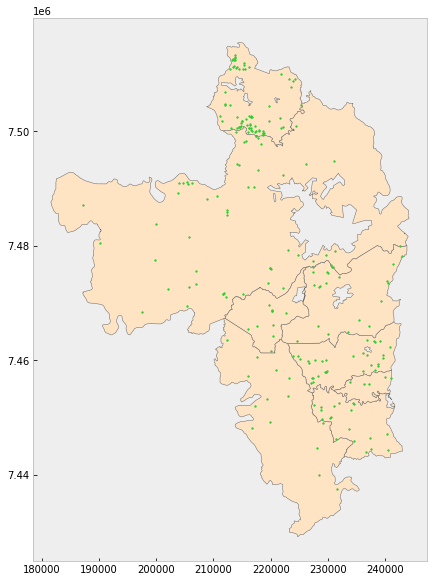

In [24]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.grid(False)

# Plot data
perimetro_pira.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
pontos_pira.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 3)
# plt.plot(ax = y, marker = 'o', color = 'royalblue', markersize = 3)

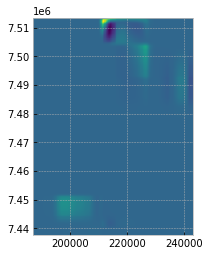

In [ ]:
extent = [pontos_pira.geometry.x.min(),pontos_pira.geometry.x.max(), pontos_pira.geometry.y.min(),pontos_pira.geometry.y.max()]
imshow(y, interpolation="none", extent=extent, origin="lower")

<AxesSubplot:>

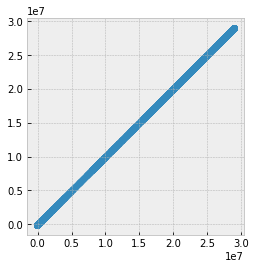

In [ ]:
arr1x = np.ravel(y[0])
arr1y = np.ravel(y[1])

df1 = pd.DataFrame({'X':arr1x, 'Y':arr1y})
df1['coords'] = list(zip(df1['X'], df1['Y']))
df1['coords'] = df1['coords'].apply(Point)
gdf1 = gpd.GeoDataFrame(df1, geometry='coords')
gdf1.plot()


# path_out = os.getcwd() + '\Dados vetoriais\Piracicaba\interp.shp'
# gdf1.to_file(path_out)

In [ ]:
# grid = griddata((pontos_pira.geometry.x, pontos_pira.geometry.y), pontos_pira.Argila, (df['x'],df['y']), 'linear')
# X, Y = np.meshgrid(pontos_pira.geometry.x, pontos_pira.geometry.y)
# Z = pontos_pira.Argila.to_numpy()


# x2 = df['x']
# y2 = df['y']
# Z2 = y

# fig, ax = plt.subplots(nrows=1, ncols=2)
# ax[0].pcolormesh(x2, y2, y)

# X2, Y2 = np.meshgrid(x2, y2)
# ax[1].pcolormesh(X2, Y2, y)

# plt.show()

C:\Users\diasc\AppData\Local\Temp\ipykernel_7660\2023159884.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[0].pcolormesh(x2, y2, y)
C:\Users\diasc\AppData\Local\Temp\ipykernel_7660\2023159884.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[0].pcolormesh(x2, y2, y)
C:\Users\diasc\AppData\Local\Temp\ipykernel_7660\2023159884.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[1].pcolormesh(X2, Y2, y)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000165FFD8FBE0> (for post_execute):


ValueError: x and y must be the same size

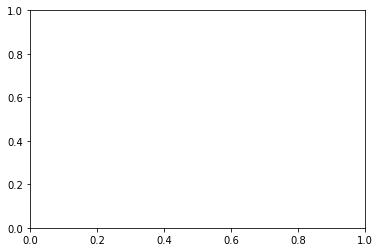

In [ ]:
plt.scatter(pontos_pira.geometry.x,y)
plt.show()

In [ ]:
data = {'x': pontos_pira.geometry.x, 'y': y}
df2 = pd.DataFrame(data = data)
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2.x, df2.y))

gdf = gdf.set_crs(epsg=31983)

path_out = os.getcwd() + '\Dados vetoriais\Piracicaba\municipios_filter.shp'
gdf.to_file(path_out)

<AxesSubplot:>

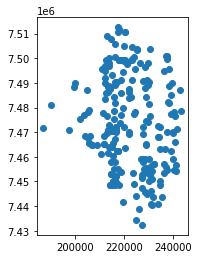

In [ ]:
gpd.read_file(os.getcwd()+ '\Dados vetoriais\Piracicaba\municipios_filter.shp').plot()